In [1]:
## This tutorial is a first attempt to create a computer vision training module using OpenCV using Python 3
## Written by Max Feldman and Jaebum Park USDA-ARS


## This tutorial makes use of many free Python packages you will need to download off the internet
## Here is a link to a tutorial of how to get packages/libraries
## https://packaging.python.org/tutorials/installing-packages/
## Max's favorite package manager is pip

## Download

## cv2
## skimage
## numpy
## pandas
## matplotlib
## os
## glob
## csv
## datetime
## time
## re

## Load in the packages needed within the program using 'import'

## Image analysis libraries
import cv2
## OpenCV (cv2) is the workhorse library, it encodes many useful functions that help make image processing easy
## In Python, the OpenCV functions are actually links to C functions that perform the heavy lifting
## This provides the speed of C and blissful ignorance of Python
## Here is a popular OpenCV tutorial
## https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html

import skimage
from skimage import feature
## I don't remember why we used the skimage library
## Here you are getting a sublibrary of skimage named feature

## Import some commonly used arithmatic (numpy), matrix manipulation (pandas), and plotting libraries (matplotlib) in Python
import numpy as np
import pandas as pd
## using the convention 'as' makes it so you can refer to the encoded functions by an abbreviated name in this case 'pd'
import matplotlib.pyplot as plt
## in this case 'plt'

## Load in some other useful libraries
import sys
## Variables and functions associated with your operating system
import os.path
## Directory lookup and access
import glob
## Use this to get a objects within a directory that matches a text string pattern (aka regular expression)
import csv
## Functionality to load and write files in .csv format
from datetime import date
## Manipulation and formatting to match commonly used time stamp formats
from time import sleep
## sleep is generally used to wait for a period of time while another process is running, commonly used in hardware interfaces/prototyping
import re
## Regualar expression module (pattern matching)
## Here is an intro to regular expression: 



In [2]:
## First lets get the present working directory using the os.path library getcwd() function
pwd = os.getcwd()
## Notice the syntax... first the library name (os) then the function (getcwd) seperated by a period
## This is how it works in Python, print what was saved to the variable pwd
print(pwd)

## Now lets make a regular expression to search with...
## Here is a tutorial on regular expression in Python
## https://docs.python.org/3/howto/regex.html

## We are combining (concatenating) the text string saved in 'pwd' with the text string '/black_background_1/*.jpg'
infile_query = pwd + "/black_background_1/*.jpg"
## The symbol "*" is a wildcard character that matches anything
## So this text string will match any file in this present directory that is a .jpg file
print("This string is what you are searching for: ")
print(infile_query)

## Now lets get the file names using the glob function from the glob library
files = glob.glob(infile_query)
print(files)
print(type(files))
## This returns a Python list of file names

## To sort the entries in the list use the sort function
files.sort()
## Notice that no new variable is created for the sorted list

/Users/max.feldman/Downloads/python_opencv_tutorial-master
This string is what you are searching for: 
/Users/max.feldman/Downloads/python_opencv_tutorial-master/black_background_1/*.jpg
['/Users/max.feldman/Downloads/python_opencv_tutorial-master/black_background_1/1_1_1_std.jpg']
<class 'list'>


In [3]:
## Get the name of the first image file from the list of images in the current directory you just created
## Lets call if 'f'
f = files[0]
## Note that in Python and Perl the first element of a list is always 0 not 1
print(f)

## Lets extract the actual name of the image from its file path
## Here we are using the split function on the string object named 'f' 
## We are splitting it up into substrings of text seperated by "/"
## We are assigning the last substring in that list [-1] to the variable image_name
image_name = f.split("/")[-1]
print(image_name)

## What do you get back if you take the first element of the substring list? 
print("First element of substring list:")
print(f.split("/")[0])
## How about the second?

## Now lets remove the string ".jpg" from the name using the Python replace function
image_name = image_name.replace(".jpg", "")

/Users/max.feldman/Downloads/python_opencv_tutorial-master/black_background_1/1_1_1_std.jpg
1_1_1_std.jpg
First element of substring list:



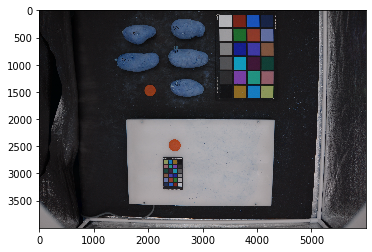

In [4]:
## Lets load in the image name saved in the variable f

## Use the imread function in the cv2 library to load the image named 'f'
img = cv2.imread(f)

## Lets examine the image using the imshow() function from the matplotlib library
plt.imshow(img)
plt.show()
## Isn't that odd... the color doesn't seem correct
## The reason is that OpenCV has a different default order for the image channels than the camera/sensor used to acquire the image
## The default for OpenCV is BGR whereas the actual image is RGB

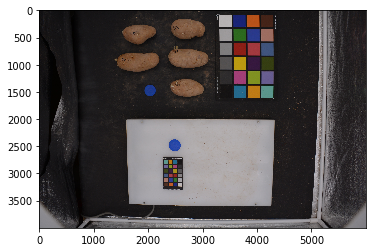

4000
6000
3


In [5]:
## Lets change this using the cvtColor() function in OpenCV
imgC = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Plot it again
plt.imshow(imgC)
plt.show()
## Looks better no?

## Image data is actually a lot like an Excel spreadsheet or a data.frame in R
## The x and y coordinates are just the columns and rows, whereas the z coordinate is the channel/sheet (R,G,B) 
## The values within each matrix span the spectrum between 0 - 255
## Low values, those near zero will be darker (black), whereas those near the top end of the spectrum 255 will be white

## Here you can get the dimensions of the image using the 'shape' function from the numpy (np) library
iy, ix, iz = np.shape(img)
print(iy)
print(ix)
print(iz)
# Looks like the image is 4000 x 6000 pixels and has 3 channels

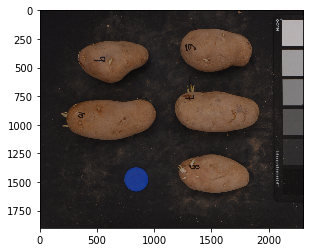

In [6]:
## Lets start processing the image

## Lets crop the image to remove background/unneccessary features
## The syntax for subsetting a matrix/data frame is similar to R but not identical
img_crop = imgC[0:1900, 1200:3500]
## Try changing the numbers and see what happens...

plt.imshow(img_crop)
plt.show()


Dimensions of blurred RGB image:
(1900, 2300, 3)
Dimensions of blurred HSV image:
(1900, 2300, 3)
The dimesions of the 's' aka 'saturation' channel is:
(1900, 2300)
Here is the HSV image:


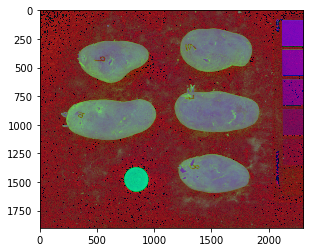

Here is the 's' aka 'saturation' channel/dimension from the HSV image:


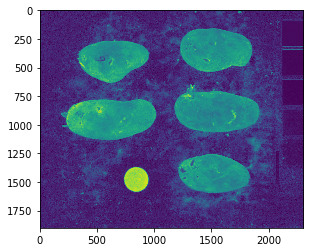

In [7]:
## Now that we have a good looking image lets start the process of isolating objects of interest

## One step commonly used is to blur the image to dampen the influence of small background features (salt-and-pepper noise)
## Here we are using a 5 x 5 kernel (window) and blurring it along the x-axis and y-axis 3X standard deviations 
## More discussion can be found here: 
## https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

blur = cv2.GaussianBlur(img_crop, (5, 5), 3)
## Try increasing the third arguement (3) to a larger number

## The next step is to convert this image to different color spaces
## Converting to different color spaces can help increase contrast between objects of interest and background

## Convert to HSV color space
## About HSV:
## https://programmingdesignsystems.com/color/color-models-and-color-spaces/index.html
imgHSV = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

## Note that imgHSV has the same dimensions as the original image
print("Dimensions of blurred RGB image:")
print(np.shape(blur))
print("Dimensions of blurred HSV image:")
print(np.shape(imgHSV))

## Convert to LAB
## About LAB format:
## https://en.wikipedia.org/wiki/CIELAB_color_space
imgLAB = cv2.cvtColor(blur, cv2.COLOR_BGR2Lab)

## Now we split out each color space into its own image
## The resulting image will now be grayscale because it lacks the other channels/dimensions that provide color 
h, s, v = cv2.split(imgHSV)

print("The dimesions of the 's' aka 'saturation' channel is:")
print(np.shape(s))

print("Here is the HSV image:")
plt.imshow(imgHSV)
plt.show()

print("Here is the 's' aka 'saturation' channel/dimension from the HSV image:")
plt.imshow(s)
plt.show()

## Now just like HSV, split out LAB channels
l, a, b = cv2.split(imgLAB)

## Also get the individual R, G, B channels by subsetting the 3D matrix
## Note the syntax blur[:,:,0] will give all pixels in the first dimension of the matrix
r = blur[:, :, 0]
g = blur[:, :, 1]
bl = blur[:, :, 2]

The 's' aka 'saturation' channel/dimension from the HSV image shows good contrast:


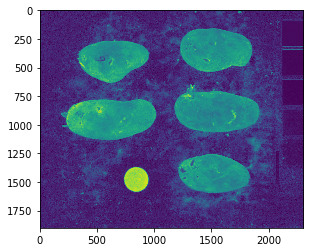

The tubers in the 'h' aka 'hue' channel/dimension from the HSV image shows poor contrast:


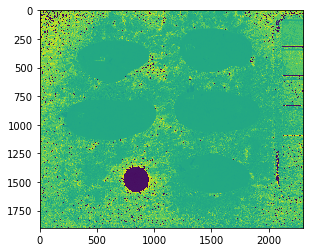

Here is a histogram of the pixels in the Saturation channel


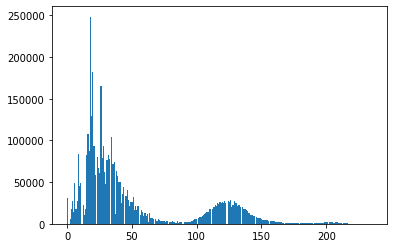

Thresholding value used: 
85.0
Here is the resulting binary image


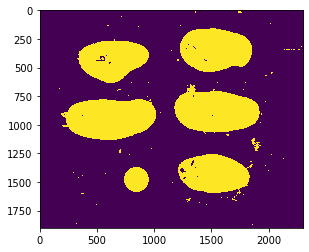

In [8]:
## We now have 9 different channels to work with (R,G,BL,H,S,V,L,A,B)
## Our main objective is to find channels where good contrast between the tubers (or marker) and background exists

## Recall from above the 's' (aka saturation channel looked promising)
print("The 's' aka 'saturation' channel/dimension from the HSV image shows good contrast:")
plt.imshow(s)
plt.show()
## Clearly the tubers exhibit different values than the background

## This is not the case for all channels
print("The tubers in the 'h' aka 'hue' channel/dimension from the HSV image shows poor contrast:")
plt.imshow(h)
plt.show()

## The values within each matrix span the spectrum between 0 - 255
## Low values, those near zero will be darker (black), whereas those near the top end of the spectrum (255) will be white
## We need to find a number that where if we take everything above that number we get only tubers or only background

## One way to do this is look at the distribution of values in the image
## Lets plot a histogram of the values in the 's' channel
print("Here is a histogram of the pixels in the Saturation channel")
plt.hist(s.ravel(), 256)
plt.show()
## the ravel function applied to object s (s.ravel()) turns the entire 2D matrix into a single list of numbers
## then plt.hist makes a histogram of the values that fall into 256 different bins

## To me, it looks like there are two peaks, one of values below 50 (likely background) and those between 100-150 (likely tubers)
## Can you learn to make a vertical bar at the point where you set the threshold?

## Lets try keeping all pixels that exhibit values above 85
## This process is called thresholding, assigning all pixels above a certain threshold a value of 1 and all other pixels a value of 0
## More information about thresholding can be learned here:
## https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html
s_ret, s_th = cv2.threshold(s, 85, 255, cv2.THRESH_BINARY)
## The variable 's_ret' is the value used (85), whereas the variable 's_th' is the binary image
## Value used
print("Thresholding value used: ")
print(s_ret)

## Lets look at the resulting binary image
## Pixels with value of 1 are yellow/white whereas pixels with value 0 are purple/black
print("Here is the resulting binary image")
plt.imshow(s_th)
plt.show()

## Looks like it did an okay job but still picked up a lot of background noise

The tubers in the 'b*' channel/dimension from the LAB image shows good contrast:


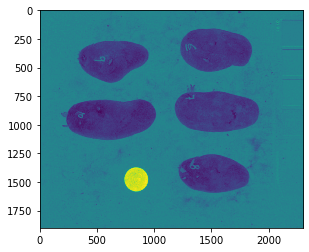

Here is a histogram of the pixels in the b* channel


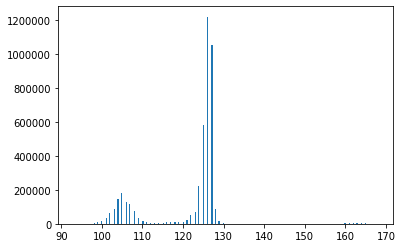

Lets look at how the resulting binary image looks:


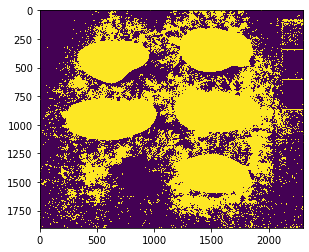

Here is the result of combining both binaries using logical AND


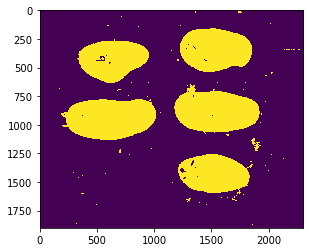

Looks okay yes?
We can do the same with the size marker/poker chip


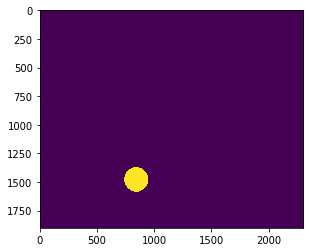

In [9]:
## We can repeat this for other channels
## How about the 'b' channel from the LAB color space?
print("The tubers in the 'b*' channel/dimension from the LAB image shows good contrast:")
plt.imshow(b)
plt.show()
## In this case the tubers are darker than the background
print("Here is a histogram of the pixels in the b* channel")
plt.hist(b.ravel(), 256)
plt.show()
## Looks like the tubers have values between 90 - 115
## Notice how we are using cv2.THRESH_BINARY_INV as the last argument to the cv2.threshold fxn
## How does this behavior differ from the thesholding we did on the 's' channel? Why is this needed?
b_ret_inv, b_th_inv = cv2.threshold(b, 125, 255, cv2.THRESH_BINARY_INV)
print("Lets look at how the resulting binary image looks:")
plt.imshow(b_th_inv)
plt.show()

## Lets use a logical "AND" statement to combine these two binary images
## Logical "AND" means that pixels that exhibit a value of 1 in both images will be assigned a value of 1 
## Those with a value of zero in one or both of the binaries will be assigned 0 
mask = cv2.bitwise_and(s_th, b_th_inv)

print("Here is the result of combining both binaries using logical AND")
plt.imshow(mask)
plt.show()
print("Looks okay yes?")

## We can also do the same for the size marker/poker chip
marker_ret, marker_th = cv2.threshold(b, 140, 255, cv2.THRESH_BINARY)
print("We can do the same with the size marker/poker chip")
plt.imshow(marker_th)
plt.show()


[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
Here's the eroded image:


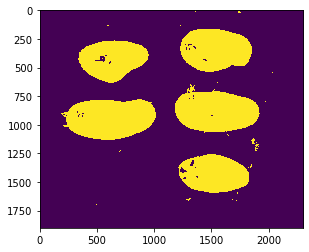

Here's the image after erosion and dilation:


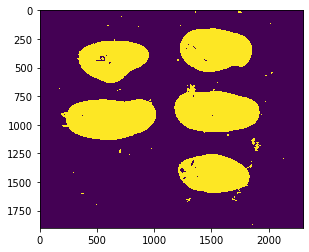

In [10]:
## Now lets use functions to remove background noise and fill in gaps

## First make a 5x5 square of ones (kernel) that we will use to perform erosion (shrinking) and then dilation (expansion)
kernel = np.ones((5, 5), np.uint8)
print(kernel)

## Now perform the removal/shrinking/erosion to both binary images (mask and chip)
mask_er = cv2.erode(mask, kernel, iterations=1)
marker_er = cv2.erode(marker_th, kernel, iterations=1)

print("Here's the eroded image:")
plt.imshow(mask_er)
plt.show()

## What happens if you change the number of iterations to 5 or 10?

## Now perform the addition/expansion/dilation to both binary images
mask_dil = cv2.dilate(mask_er, kernel, iterations=1)
marker_dil = cv2.dilate(marker_er, kernel, iterations=1)

## What happens if you change the number of iterations to 5 or 10?
## What happens if you change the kernel size?

print("Here's the image after erosion and dilation:")
plt.imshow(mask_dil)
plt.show()

In [11]:
## Now that we have our objects isolated we need to extract a set of points that defines their shape/perimeter
## The set of points that comprise the perimeter of an object is called its contour
## A good tutorial about contours is here:
## https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html

## Here we use the OpenCV findContours function 
## One key argument is the last one cv2.cv2.CHAIN_APPROX_NONE
## This specifies to the the function that you want all the points
contours, hierarchy = cv2.findContours(mask_dil, cv2.RETR_TREE, cv2.cv2.CHAIN_APPROX_NONE)
## The resulting objects are the contours themselves (contours) and a hierarchy (hierarchy) that describes their nesting relationship

## Lets get the contours of the size marker too
marker_contours, marker_hierarchy = cv2.findContours(marker_dil, cv2.RETR_TREE, cv2.cv2.CHAIN_APPROX_NONE)

How many contours for potato?
99
Drawing all potato contours in green...


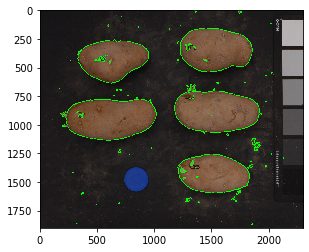

How many contours for marker?
1
Drawing all size marker contours in yellow...


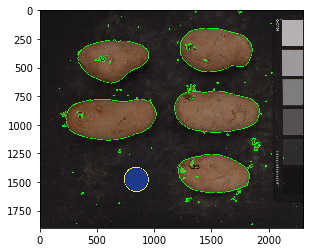

In [12]:
## Now one thing about the variation between images and imperfect processing is that you might end up with a lot of small contours due to background noise
## How many contours do you have?
print("How many contours for potato?")
print(len(contours))

## Lets draw them..
## First we need to make a copy of the image 
## Here we are using the copy function from the numpy library
contour_img = img_crop.copy()

## Use the function draw drawContours
## See docuemntation here: 
## https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html

## Draw all contours in green
print("Drawing all potato contours in green...")
contour_img = cv2.drawContours(contour_img, contours, -1, (0,255,0), 5)
plt.imshow(contour_img)
plt.show()

## Are there any properties of the contours you want that will be different than those you'd like to remove?
## Size comes to mind...

## Look at the binary for the marker 

print("How many contours for marker?")
print(len(marker_contours))

## Even if there was more than one object it would likely be the largest one
## Thus we can sort the list
markerSorted = sorted(marker_contours, key=lambda x: cv2.contourArea(x), reverse=True)
## Then take the largest contour
marker_contour = markerSorted[0]

print("Drawing all size marker contours in yellow...")
contour_img = cv2.drawContours(contour_img, [marker_contour], 0, (255,255,0), 5)
plt.imshow(contour_img)
plt.show()


In [13]:
## Next step is to remove all contours that are not potato and get the correct tuber order
## We will do this in a python loop
## Here is some documetation about loops in Python:
## https://www.learnpython.org/en/Loops

## Lets see one in action
## First make a list of variables
potatoes = ['burbank', 'ranger', 'clearwater', 'norkotah']

## The syntax is pretty simple
## Python uses spaces to break the code in to blocks, the most common is 4 spaces

for p in potatoes:
    print('This time the potato is: ')
    print(p)
    ## Note the nesting structure      
    if p == "clearwater":
        print("The 3rd Entry is a " + p + " potato.")

## Look okay?
## Notice how most of the time like in R "" and '' can be used interchangably and strings ("string") can be mixed with variables

This time the potato is: 
burbank
This time the potato is: 
ranger
This time the potato is: 
clearwater
The 3rd Entry is a clearwater potato.
This time the potato is: 
norkotah


In [14]:
## First lets sort the contours by size (the potatoes and size marker will be the biggest)
cntsSorted = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
## Now lets keep only the 6 largest objects
contours = cntsSorted[0:5]

## Lets create some variables to populate within the the loop

## This variable (contours_out) will be a list of the contours in the desired order
contours_out = []
## This variable (it) will be the number of times through the loop
it = 0
## This variable will contain the centroid of each object (centroid X Y)
cXY = []

## Here's the for loop in action
## Basically, for each contour (cnt) in the list (contours), get the area of the contour
## If the area is big enough add it to the object named contours_out
## For this contour, calculate some basic properties using OpenCV using the cv2.moments() function
## More information about this can be found here:
## https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html

## After we have the x and y coordinate of the centroid (basically the center of the object)
## Associate this information with what the order number the contour is in the list
## This will be temporarily saved in a variable named entry and eventually appended to variable cXY
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 3000:
        contours_out.append(cnt)
        M = cv2.moments(cnt)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        print(cX)
        print(cY)
        entry = [it, cX, cY]
        print(entry)
        cXY.append(entry)
        it += 1


609
945
[0, 609, 945]
1529
881
[1, 1529, 881]
1526
345
[2, 1526, 345]
629
431
[3, 629, 431]
1510
1428
[4, 1510, 1428]


[[0, 609, 945], [1, 1529, 881], [2, 1526, 345], [3, 629, 431], [4, 1510, 1428]]
   cnt   cmx   cmy
0    0   609   945
1    1  1529   881
2    2  1526   345
3    3   629   431
4    4  1510  1428
See how we can extract the 3 tubers from the right hand side based upon their 'cmx' value?
   cnt   cmx   cmy
1    1  1529   881
2    2  1526   345
4    4  1510  1428
3    3   629   431
0    0   609   945


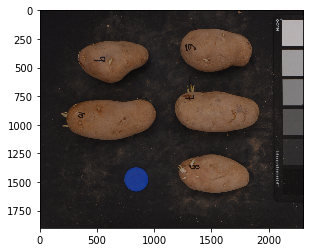

Here are the contents of the variable 'right_side':
   cnt   cmx   cmy
2    2  1526   345
1    1  1529   881
4    4  1510  1428
Here are the contents of the variable 'left_side':
   cnt  cmx  cmy
3    3  629  431
0    0  609  945
[2, 1, 4, 3, 0, 5]


In [15]:
## Okay so now we have 5 contours and some basic information about them (order in the contour list, x-coordinate of the centroid, and y-coordinate of the centroid)
print(cXY)
## Because they are laid out on the imaging surface like reading a book (left-to-right, top-to-bottom) we can put them in the correct order

## To sort them lets convert this list into a pandas data.frame 
## Recall from above pd is the abbreviation we gave to pandas library when we read it in
## We'll give the data frame a stupid name like 'df'
df = pd.DataFrame(cXY, columns=['cnt', 'cmx', 'cmy'])
print(df)

## First we will sort the values by centroid on the x-axis
df = df.sort_values(by='cmx', ascending=False)
## Notice how we can distinctly see the 3 tubers to the right hand side

print("See how we can extract the 3 tubers from the right hand side based upon their 'cmx' value?")
print(df)
plt.imshow(img_crop)
plt.show()

## Lets get those tubers
right_side = df[:3]

## Now we can sort the tubers/contours by their centroid value on the y-axis
right_side = right_side.sort_values(by='cmy')
print("Here are the contents of the variable 'right_side':")
print(right_side)

## Lets get the tubers on the left now
left_side = df[3:5]
## Same thing as above but with the left hand side
left_side = left_side.sort_values(by='cmy')
print("Here are the contents of the variable 'left_side':")
print(left_side)

## Now lets generate a list of which contour is which

## Here we just getting a Python list of the sorted contours
cnt_order = right_side['cnt'].tolist()
## Now were just appending to the list
cnt_order = cnt_order + left_side['cnt'].tolist()
cnt_order.append(5)
print(cnt_order)

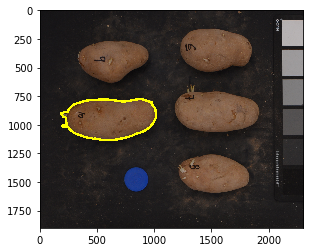

Contour number: 0


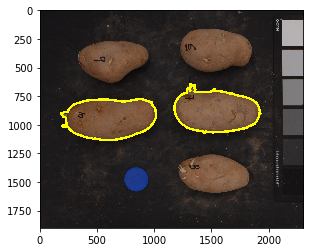

Contour number: 1


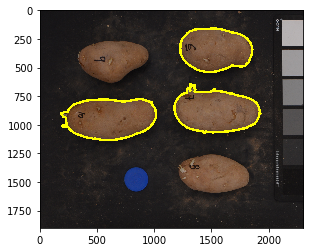

Contour number: 2


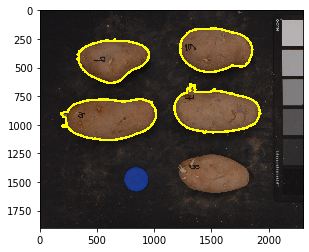

Contour number: 3


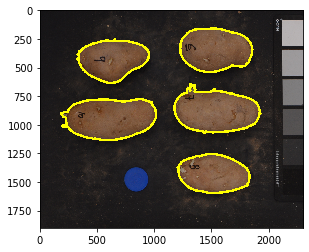

Contour number: 4


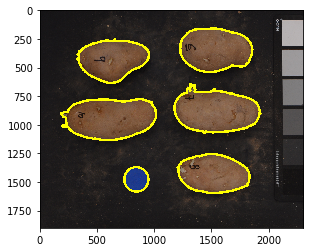

Contour number: 5


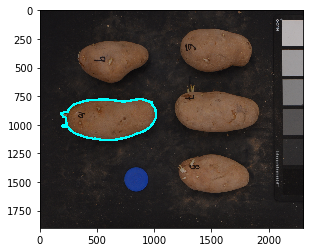

Contour number: 0


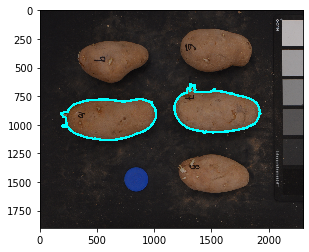

Contour number: 1


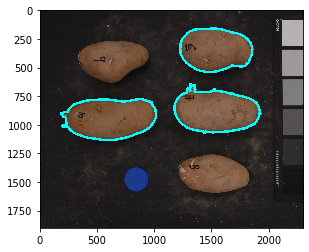

Contour number: 2


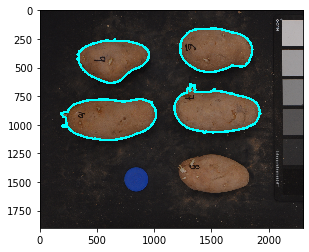

Contour number: 3


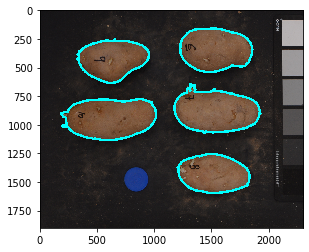

Contour number: 4


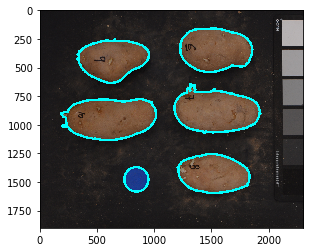

Contour number: 5


In [17]:
## Lets plot the contours and see if we're doing okay
img_draw = img_crop.copy()
## Add the marker_contour to the list of potato contours 
contours_out.append(marker_contour)
it = 0
for cnt in contours_out:
    img_draw = cv2.drawContours(img_draw, [cnt], 0, (255,255,0), 20)
    plt.imshow(img_draw)
    plt.show()
    print("Contour number: " + str(it))
    it += 1

## There's more than one way to do it (TMTWDI)
img_draw = img_crop.copy()
it = 0
length = len(contours_out)
for i in range(length):
    img_draw = cv2.drawContours(img_draw, contours_out, i, (0,255,255), 20)
    plt.imshow(img_draw)
    plt.show()
    print("Contour number: " + str(i))
    it += 1

In [21]:
## Lets close out this session by writing an image to file:

## First lets make a results directory
outfile_dir = pwd + "/results"
os.mkdir(outfile_dir)

## This is just a fancy way of making the file path we did above
outfile = os.path.join(outfile_dir, "result_section_1.png")
## We also could have done it like 
outfile = outfile_dir + "/result_section_1.png"

## Here you're writing the output, the first argument outfile is where to save it (path) 
## The second is the image, in this case lets save it bak to BGR so it looks normal when you open it
cv2.imwrite(outfile, cv2.cvtColor(img_draw, cv2.COLOR_RGB2BGR))

True

In [ ]:
## How would you adapt this program to work on the image located in /illuminator_1    ???